In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
%cd ./drive/My\ Drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import  model_selection

In [0]:
import sys
import warnings

warnings.simplefilter("ignore")

In [0]:
df=pd.read_csv('Datasets/iris.csv',header=None,names=['SL','SW','PL','PW','class'])
df.head()

FileNotFoundError: ignored

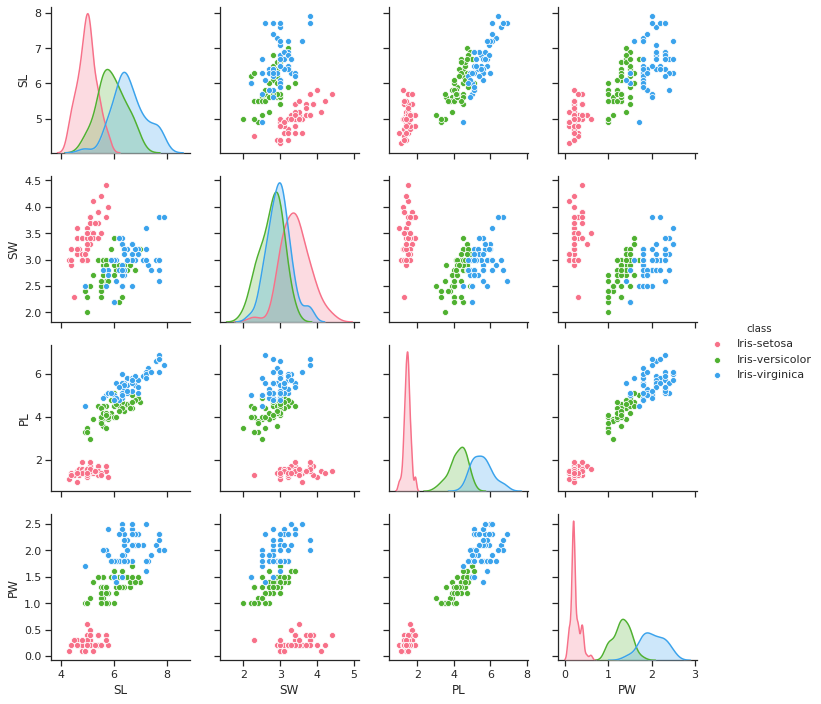

In [0]:
sns.set(style='ticks',color_codes=True)
sns.pairplot(df,hue='class',palette='husl')
plt.show()

SW is a weak predictor

PL: 
    
    virginica has high PL

    versicolor has moderate
    
    setosa jas minimum PL

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=df.drop('class',axis=1)
y=df['class']
for i in X.columns:
    X[i]=sc.fit_transform(X[[i]])
X.head()

,SL,SW,PL,PW
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [0]:
df['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

# KMEANS CLUSTERING

without PCA

In [0]:
from sklearn.cluster import KMeans
cluster_range=range(1,15)
cluster_inertia=[]
for num_clusters in cluster_range:
    model=KMeans(num_clusters)
    model.fit(X)
    cluster_inertia.append(model.inertia_)

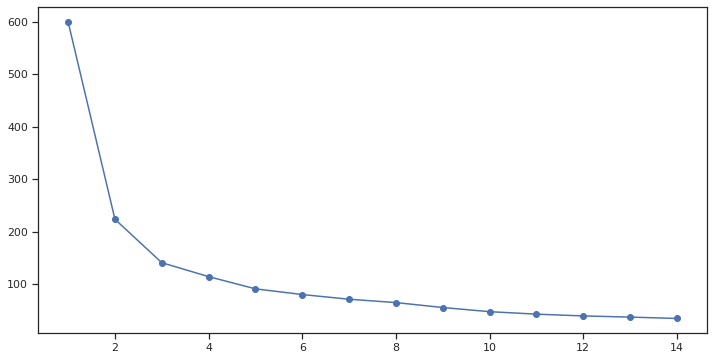

In [0]:
plt.figure(figsize=(12,6))
plt.plot(cluster_range,cluster_inertia,marker='o')
plt.show()

Cut off is 3

In [0]:
def fun(model,X,c):      
    L=pd.DataFrame(model.labels_)
    b=[]   
    d=[]
    df_ag_label=X.copy(deep=True)
    df_ag_label['labels']=model.labels_

    for i in range(c):
        b.append(df_ag_label[df_ag_label['labels']==i])
    a=df_ag_label.groupby('labels').mean()

    for i in range(c):
        d.append(a.iloc[i])
        
    k=[]    
    for j in range(len(b)):
        i0=0
        for i in np.arange(b[j].shape[0]):
            i0=i0+np.sum((b[j].iloc[i,:-1]-d[j])**2)
        k.append(i0)
    return(sum(k)),L,a,df_ag_label

In [0]:
model=KMeans(n_clusters=3,n_init=15,random_state=2)
model.fit(X)
inert,L,a,dflabel=fun(model,X,3)

In [0]:
inert

140.96581663074699

In [0]:
centroids=model.cluster_centers_
centroids

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [0]:
a

,SL,SW,PL,PW
labels,,,,
0,1.135970,0.096598,0.996271,1.017172
1,-1.014579,0.842307,-1.304878,-1.255129
2,-0.050220,-0.880292,0.347532,0.282063


0->virginica

1->setosa

2->versicolor

*accoding to PL

Text(0.5, 0.92, '3D plot of KMeans Clustering')

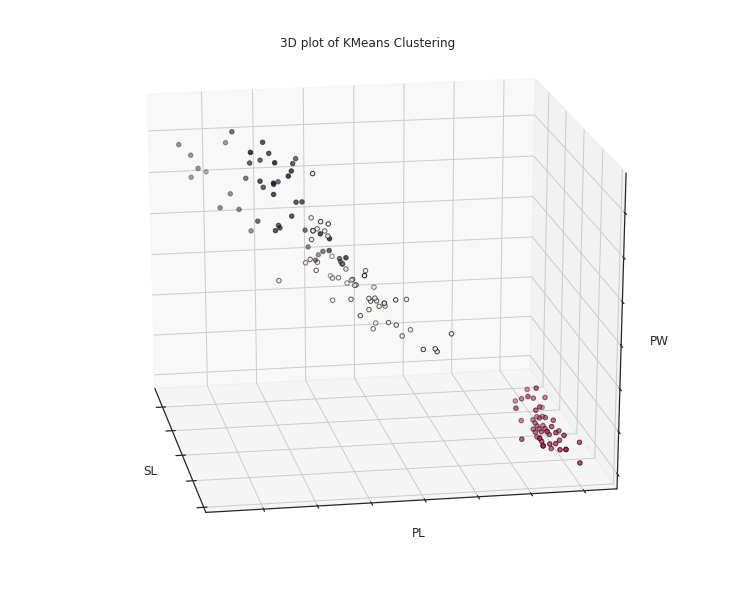

In [0]:
fig=plt.figure(figsize=(10,8))
ax=Axes3D(fig,rect=[0,0,1,1],elev=20,azim=170)
labels=model.labels_
ax.scatter(X.iloc[:,0],X.iloc[:,2],X.iloc[:,-1],c=labels.astype(np.float),edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('SL')
ax.set_ylabel('PL')
ax.set_zlabel('PW')
ax.set_title('3D plot of KMeans Clustering')

In [0]:
L[0].value_counts()

2    53
1    50
0    47
Name: 0, dtype: int64

In [0]:
dflabel.head()

,SL,SW,PL,PW,labels
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1


In [0]:
import plotly.express as px
fig = px.scatter_3d(dflabel, x='SL', y='PL', z='PW',color='labels')
fig.show()

red is setosa

yellow is versicolor

blue is virginica

#with PCA

In [0]:
eig_vals,eig_vecs=np.linalg.eig(X.cov())

In [0]:
print('Eigen Vectors:',eig_vecs)
print('\nEigen Values',eig_vals)

Eigen Vectors: [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigen Values [2.93035378 0.92740362 0.14834223 0.02074601]


In [0]:
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Cumulative Variance Ecplained',cum_var_exp)

Cumulative Variance Ecplained [ 72.77045209  95.80097536  99.48480732 100.        ]


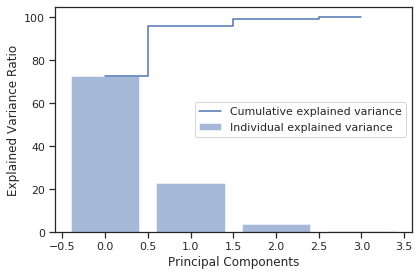

In [0]:
plt.figure(figsize=(6,4))
plt.bar(range(X.shape[1]),var_exp,alpha=0.5,align='center',label='Individual explained variance')
plt.step(range(X.shape[1]),cum_var_exp,where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [0]:
temp1=pd.DataFrame(eig_vecs)
temp1=temp1.T
t2=pd.DataFrame(eig_vals,columns=['values'])
t1=pd.concat([temp1,t2],axis=1,join='outer')
t1=t1.sort_values(by=['values'],ascending=False)
t1

,0,1,2,3,values
0,0.522372,-0.263355,0.581254,0.565611,2.930354
1,-0.372318,-0.925556,-0.021095,-0.065416,0.927404
2,-0.721017,0.242033,0.140892,0.633801,0.148342
3,0.261996,-0.124135,-0.801154,0.523546,0.020746


In [0]:
p_reduce=t1.iloc[:2,:-1]#droping values and last insignificant pca
p_reduce=p_reduce.T
p_reduce

,0,1
0,0.522372,-0.372318
1,-0.263355,-0.925556
2,0.581254,-0.021095
3,0.565611,-0.065416


In [0]:
p_reduce.shape

(4, 2)

In [0]:
X_pca=np.dot(X,p_reduce)
X_pca.shape

(150, 2)

In [0]:
X_PCA=pd.DataFrame(X_pca,columns='pc1 pc2'.split())
X_PCA.head()

,pc1,pc2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


In [0]:
model=KMeans(n_clusters=3,n_init=15,random_state=2)
model.fit(X_PCA)
inert,L,a,dflabel=fun(model,X_PCA,3)

In [0]:
inert

116.10924021401527

In [0]:
a

,pc1,pc2
labels,,
0,1.722369,-0.599905
1,-2.220193,-0.292225
2,0.567138,0.807675


In [0]:
L[0].value_counts()

2    53
1    50
0    47
Name: 0, dtype: int64

In [0]:
import plotly.express as px
fig = px.scatter(dflabel, x='pc1', y='pc2',color='labels')
fig.show()

#AGGLOMERATIVE
without PCA

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
d1={}
for aff in['euclidean','manhattan','cosine']:
    for lk in['single','complete','average','ward']:
        if(lk=='ward' and aff!='euclidean'):
            continue
        model=AgglomerativeClustering(n_clusters=3,affinity=aff,linkage=lk)
        model.fit(X)
        inert,L,a,dflabel=fun(model,X,3)
        st=str(lk)+' '+str(aff)
        d1[st]=inert
print(d1)
mn=min(d1.values())
a=[i for i in d1 if(d1[i]==mn)]
print('best model:',a[0],mn)


{'single euclidean': 216.5044233460428, 'complete euclidean': 155.05895620648033, 'average euclidean': 199.42361913769506, 'ward euclidean': 150.1223254726958, 'single manhattan': 204.81566964353334, 'complete manhattan': 152.98578313371314, 'average manhattan': 147.60928130489376, 'single cosine': 229.09929253474812, 'complete cosine': 158.47794975370255, 'average cosine': 156.08827297930932}
best model: average manhattan 147.60928130489376


In [0]:
model1=AgglomerativeClustering(n_clusters=3,affinity='manhattan',linkage='average')
model1.fit(X)
inert,L,a,dflabel=fun(model1,X,3)

In [0]:
inert

147.60928130489376

In [0]:
a

,SL,SW,PL,PW
labels,,,,
0,-1.014579,0.842307,-1.304878,-1.255129
1,1.259569,0.099834,1.151070,1.200035
2,0.102216,-0.701685,0.383946,0.319311


0->setosa

1->virginica

2->versicolor

In [0]:
dflabel.head()

,SL,SW,PL,PW,labels
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


In [0]:
import plotly.express as px
fig = px.scatter_3d(dflabel, x='SL', y='PL', z='PW',color='labels')
fig.show()

with PCA

In [0]:
d1={}
for aff in['euclidean','manhattan','cosine']:
    for lk in['single','complete','average','ward']:
        if(lk=='ward' and aff!='euclidean'):
            continue
        model=AgglomerativeClustering(n_clusters=3,affinity=aff,linkage=lk)
        model.fit(X_PCA)
        inert,L,a,dflabel=fun(model,X_PCA,3)
        st=str(lk)+' '+str(aff)
        d1[st]=inert
print(d1)
mn=min(d1.values())
a=[i for i in d1 if(d1[i]==mn)]
print('best model:',a[0],mn)

{'single euclidean': 191.57887203833783, 'complete euclidean': 218.024160374695, 'average euclidean': 191.57887203833783, 'ward euclidean': 118.47266027593496, 'single manhattan': 191.57887203833783, 'complete manhattan': 133.4878448235601, 'average manhattan': 174.47518580960917, 'single cosine': 191.57887203833783, 'complete cosine': 136.07400278647043, 'average cosine': 125.47672091404954}
best model: ward euclidean 118.47266027593496


In [0]:
model1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
model1.fit(X_PCA)
inert,L,a,dflabel=fun(model1,X_PCA,3)

In [0]:
inert

118.47266027593496

In [0]:
L[0].value_counts()

1    61
0    50
2    39
Name: 0, dtype: int64

#supervised classification

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [0]:
LR=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=15)
dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)#fully grown decision tree high bias error
rf_model=RandomForestClassifier(n_estimators=20,random_state=0)
bag_model=BaggingClassifier(n_estimators=35,random_state=0)
model_ada=AdaBoostClassifier(n_estimators=60,random_state=0)#default decision tree
model_grad=GradientBoostingClassifier(n_estimators=100,random_state=0)
model_ada_rf=AdaBoostClassifier(base_estimator=rf_model,n_estimators=100,random_state=0)
Gauss_NB=GaussianNB()

In [0]:
models=[]
models.append(('MVLR',LR))
models.append(('KNN_BASE',knn))
models.append(('Decision Tree',dt_model))
models.append(('RandomForest',rf_model))
models.append(('BaggedDT',bag_model))
models.append(('Adaboost_DT',model_ada))
models.append(('GradientBoosting',model_grad))
models.append(('Adaboost_RF',model_ada_rf))
models.append(('Naive Bayes',Gauss_NB))

In [0]:
df.shape

(150, 5)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.3,random_state=1,stratify=y)

MVLR: 85.719070
		Bais error :  0.14280930245842527
		Variance error:  0.0009274033657717408
KNN_BASE: 88.687202
		Bais error :  0.11312798312798333
		Variance error:  0.003114688134967837
Decision Tree: 92.445972
		Bais error :  0.0755402792696026
		Variance error:  0.00025426975140782783
RandomForest: 94.299666
		Bais error :  0.05700334111100158
		Variance error:  0.0008096545031444251
BaggedDT: 93.378408
		Bais error :  0.06621591502945778
		Variance error:  0.0010681249630223222
Adaboost_DT: 79.059329
		Bais error :  0.20940670765232172
		Variance error:  0.03742959385631819
GradientBoosting: 92.445972
		Bais error :  0.0755402792696026
		Variance error:  0.00025426975140782783
Adaboost_RF: 91.480230
		Bais error :  0.08519769990358228
		Variance error:  0.0008093368954374476
Naive Bayes: 91.523426
		Bais error :  0.08476574029490802
		Variance error:  0.003102294831402036


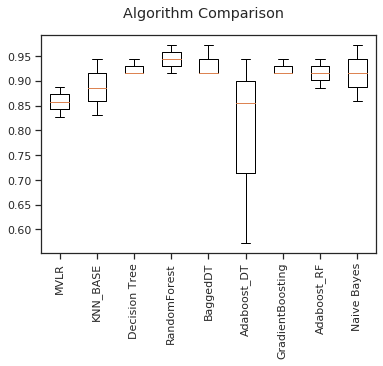

In [0]:
#for classification
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=3,shuffle=True,random_state=0)
    auc =cross_val_score(model,x_train,y_train,cv=kfold,scoring='f1_weighted')
    results.append(auc)
    names.append(name)
    print('%s: %f' % (name,np.mean(auc*100)))
    BE =1-np.mean(auc)#Bias error
    VE =np.var(1-auc,ddof=1)#variance error
    print("\t\tBais error : ", BE)
    print("\t\tVariance error: ",VE)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

Random Forest is the best model

In [0]:
rf_model.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
ypred=rf_model.predict(x_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,ypred))
print(confusion_matrix(y_test,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.78      0.93      0.85        15
 Iris-virginica       0.92      0.73      0.81        15

       accuracy                           0.89        45
      macro avg       0.90      0.89      0.89        45
   weighted avg       0.90      0.89      0.89        45

[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


#regression

In [0]:
df=pd.read_csv('Datasets/car-mpg.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [0]:
df[df['hp']=='?']

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,0,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,1,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,1,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,1,amc concord dl


In [0]:
df['hp'].replace({'?':df['hp'][df['hp']!='?'].median()},inplace=True)

In [0]:
df['hp']=df['hp'].astype(float)

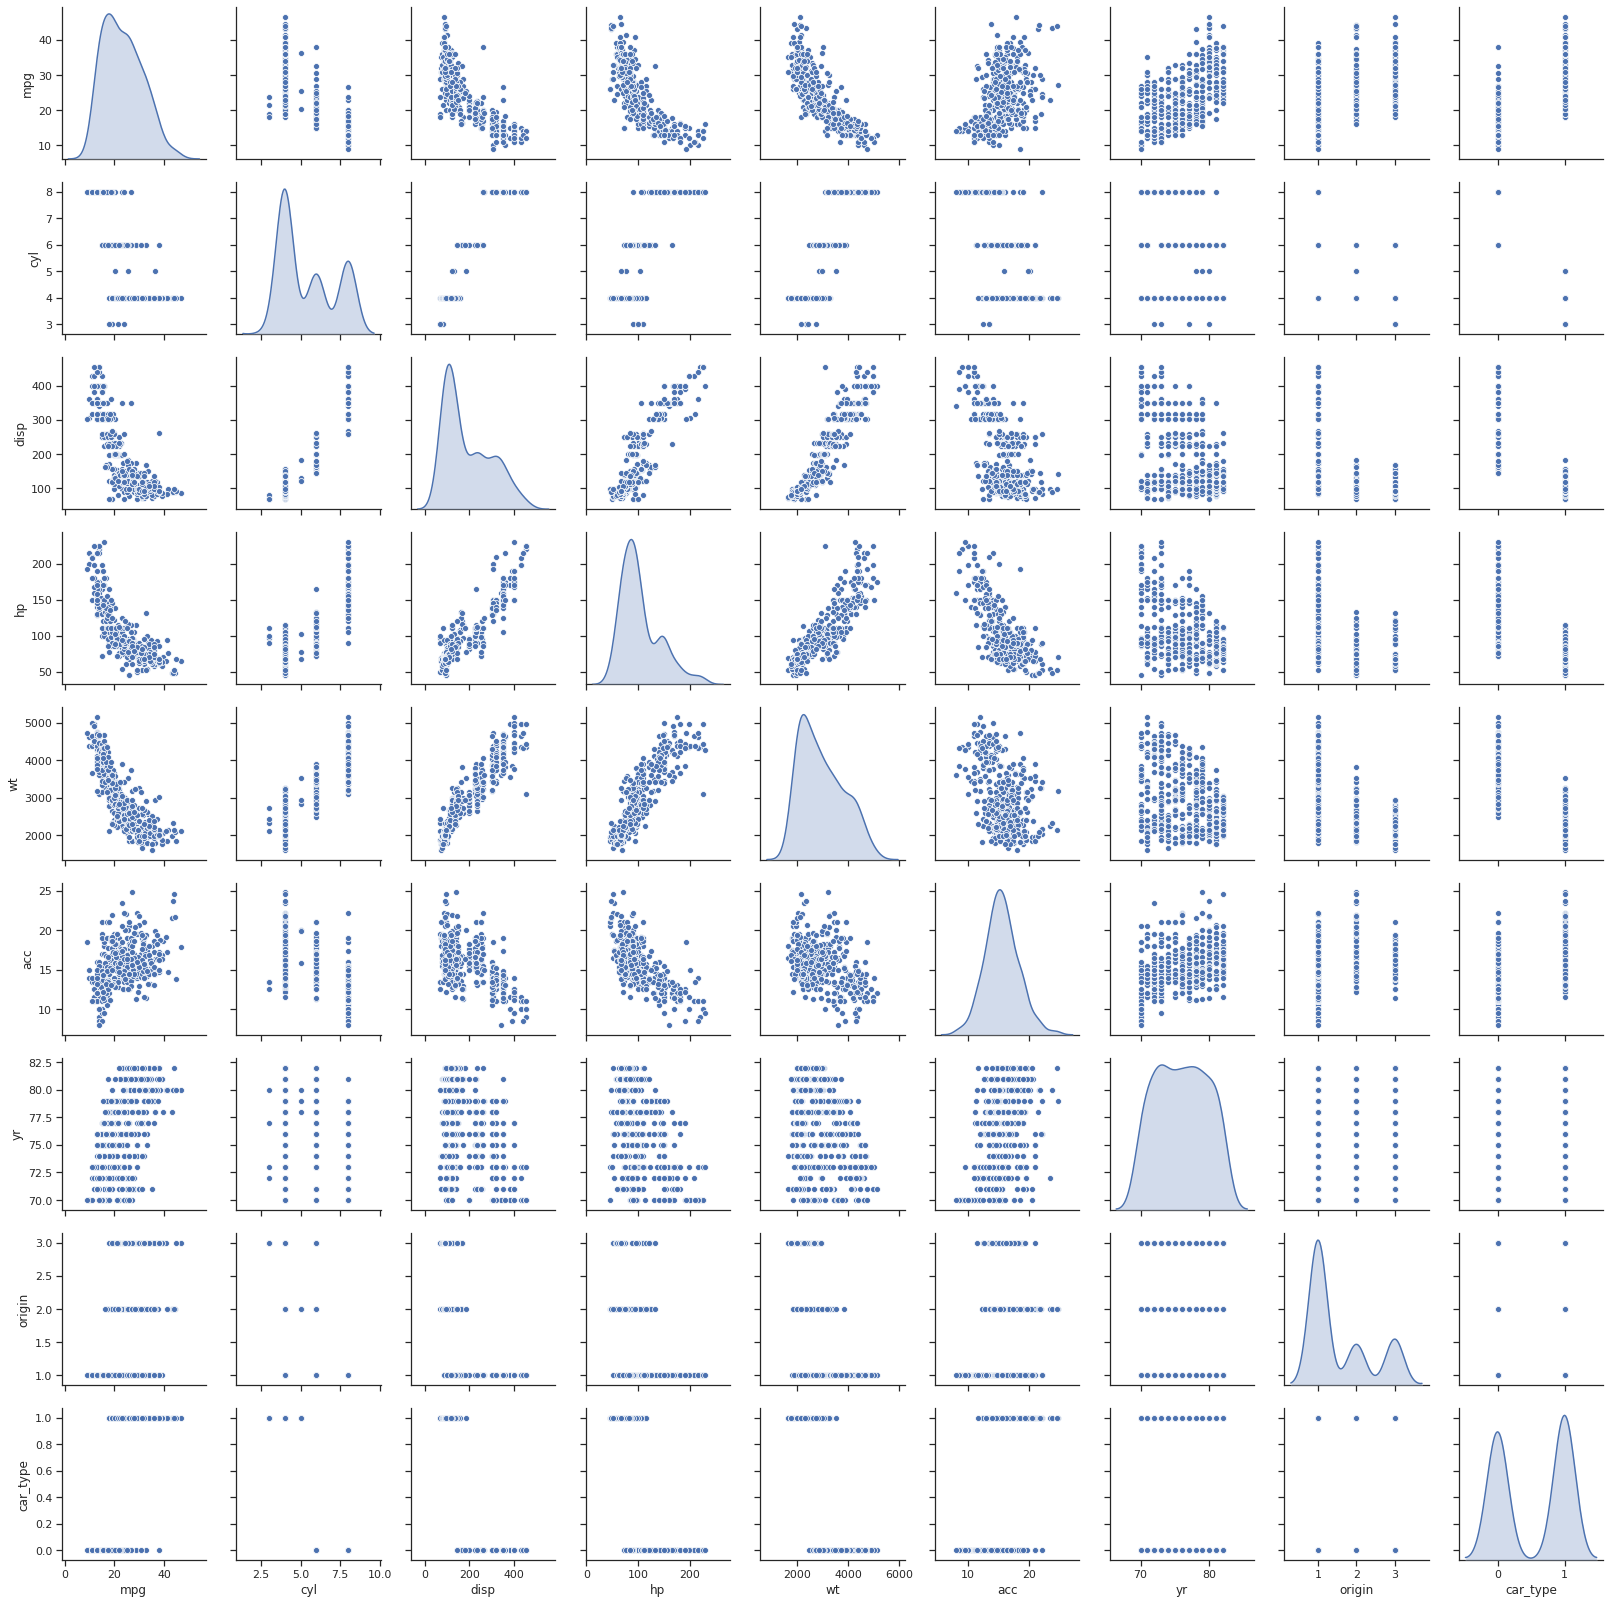

In [0]:
sns.pairplot(df,diag_kind='kde')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


In [0]:
df.corr()['mpg']

mpg         1.000000
cyl        -0.775396
disp       -0.804203
hp         -0.773453
wt         -0.831741
acc         0.420289
yr          0.579267
origin      0.563450
car_type    0.759207
Name: mpg, dtype: float64

In [0]:
df.drop('car_name',axis=1,inplace=True)

In [0]:
from scipy.stats import pearsonr,spearmanr
a=[]
for i in ['disp','wt','acc','hp']:
  corr, p = pearsonr(df[i], df['mpg'])
  print(i,p)
  if(p<0.05):
    a.append(i)
a

disp 1.6558889101930157e-91
wt 2.9727995640500577e-103
acc 1.823091535078553e-18
hp 2.000923510431005e-80


['disp', 'wt', 'acc', 'hp']

all are affecting

In [0]:
import scipy.stats as stats
col=['cyl','yr','origin','car_type']
for i in col:
  g=[]
  k=list(df[i].value_counts().index)
  for j in k:
    g.append(df[df[i]==j]['mpg'])
  flag1=False
  flag2=False
  for b in g:
    if(stats.shapiro(b)[1]>=0.05):
      flag1=True  
  if(stats.levene(*g)[1]>=0.05):
      flag2=True      
  if(flag1==True and flag2==True):
    p=stats.f_oneway(*g)[1]
  else:
    if(len(k)>2):
      p=stats.kruskal(*g)[1]
    else:
      p=stats.mannwhitneyu(*g)[1]
  print(i,' ',p)
  if(p<0.05):
    a.append(i)
a

cyl   3.3119493733881433e-60
yr   5.2640168845192595e-40
origin   1.9154864184128e-35
car_type   6.265873858276826e-57


['disp', 'wt', 'acc', 'hp', 'cyl', 'yr', 'origin', 'car_type']

In [0]:
X=df[a]
y=df['mpg']

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in X.columns:
    X[i]=sc.fit_transform(X[[i]])
X.head()

,disp,wt,acc,hp,cyl,yr,origin,car_type
0,1.090604,0.630870,-1.295498,0.673118,1.498191,-1.627426,-0.715145,-1.062235
1,1.503514,0.854333,-1.477038,1.589958,1.498191,-1.627426,-0.715145,-1.062235
2,1.196232,0.550470,-1.658577,1.197027,1.498191,-1.627426,-0.715145,-1.062235
3,1.061796,0.546923,-1.295498,1.197027,1.498191,-1.627426,-0.715145,-1.062235
4,1.042591,0.565841,-1.840117,0.935072,1.498191,-1.627426,-0.715145,-1.062235


In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
m1=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=7)
dt_model=DecisionTreeRegressor()
rf_model=RandomForestRegressor(n_estimators=100)
bag_model=BaggingRegressor(n_estimators=150)
model_ada=AdaBoostRegressor(n_estimators=50)#default decision tree
model_grad=GradientBoostingRegressor(n_estimators=170)
model_ada_rf=AdaBoostRegressor(base_estimator=rf_model,n_estimators=100)

In [0]:
models=[]
models.append(('MVLR',m1))
models.append(('KNN_BASE',knn))
models.append(('RandomForest',rf_model))
models.append(('BaggedDT',bag_model))
models.append(('Adaboost_DT',model_ada))
models.append(('GradientBoosting',model_grad))
models.append(('Adaboost_RF',model_ada_rf))

0.8257548058343561
MVLR: 3.251962 (0.316319)
0.8334968796139387
KNN_BASE: 3.171982 (0.383795)
0.8707891684967947
RandomForest: 2.785476 (0.244105)
0.8733552151637944
BaggedDT: 2.777442 (0.273728)
0.8291482331840649
Adaboost_DT: 3.165522 (0.320376)
0.8572509038044203
GradientBoosting: 2.924975 (0.130187)
0.8672516827326793
Adaboost_RF: 2.845894 (0.247201)


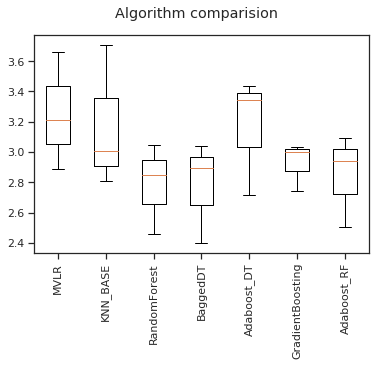

In [0]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_result=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
    cv_result_acc=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
    results.append(np.sqrt(np.abs(cv_result)))
    names.append(name)
    print(np.mean(cv_result_acc))
    print("%s: %f (%f)" % (name,np.mean(np.sqrt(np.abs(cv_result))),np.std(np.sqrt(np.abs(cv_result)))))
fig=plt.figure()
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

In [0]:

(2.785476-2.777442)/2.785476

0.00288424671402657

In [0]:
(0.273728-0.244105)/0.273728

0.10822056932429286

Bagged DT is the best model

In [0]:
bag_model.fit(X,y)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=150,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)